In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
nadia = cv2.imread('PhotosLARC/Nadia_Murad.jpg',0)
denis = cv2.imread('PhotosLARC/Denis_Mukwege.jpg',0)
solvay = cv2.imread('PhotosLARC/solvay_conference.jpg',0)

In [15]:
# Loading opencv trained classifiers
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

In [16]:
# Basic detection with haarcascade classifiers 
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)
    for(x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x + w, y + h), (255,255,255),10)
    return face_img

In [17]:
res = detect_face(solvay)

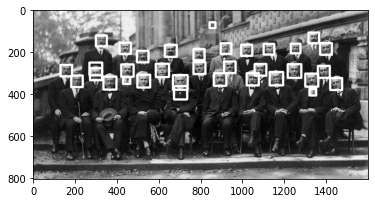

In [18]:
plt.imshow(res,cmap='gray')

In [19]:
def adjusted_detect_face(img):
    face_img = img.copy()
#     Scale factor is how much the image is reduced at each image scale
#     minNeighbors refers to how many neihbors each candidate rectangle should have to retain it
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)
    for(x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x + w, y + h), (255,255,255),10)
    return face_img

In [20]:
res = adjusted_detect_face(solvay)

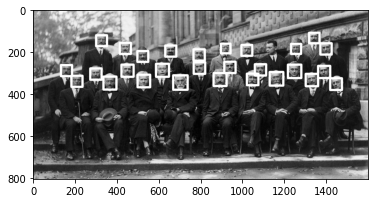

In [22]:
plt.imshow(res, cmap='gray')

In [31]:
# Playing with eye classifiers
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

In [32]:
def detect_eyes(img):
    eyes_img = img.copy()
    eyes_rects = eye_cascade.detectMultiScale(eyes_img,scaleFactor=1.2, minNeighbors=5)
    for(x,y,w,h) in eyes_rects:
        cv2.rectangle(eyes_img,(x,y),(x + w, y + h), (255,255,255),10)
    return eyes_img

In [37]:
res = detect_eyes(nadia)

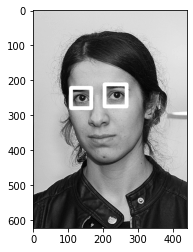

In [38]:
plt.imshow(res,cmap='gray')

In [40]:
# Trying using classifiers with video
cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read(0)
    frame = adjusted_detect_face(frame)
    cv2.imshow('Face detector!',frame)
    k = cv2.waitKey(1)
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1